In [1]:
!pip install pytorch-tabnet

You should consider upgrading via the '/Users/jay.0tist/.pyenv/versions/3.8.5/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import torch 
from pytorch_tabnet.tab_model import TabNetClassifier

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import random
from typing import List, Any, Dict
import os

In [4]:
df = pd.read_csv('districts_without_ID.csv', low_memory=False)
df.drop(columns = ['Unnamed: 0', 'Short-wave irradiation'], inplace=True)
df.columns

Index(['st_area(sh', 'st_length(', 'Confirmed', 'Active', 'Recovered',
       'Deceased', 'Zone', 'Population', 'Temperature', 'Relative Humidity',
       'Pressure', 'Wind speed', 'Wind direction', 'Rainfall', 'Snowfall',
       'Snow Depth'],
      dtype='object')

In [7]:
def seed_everything(seed=14):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

seed_everything()

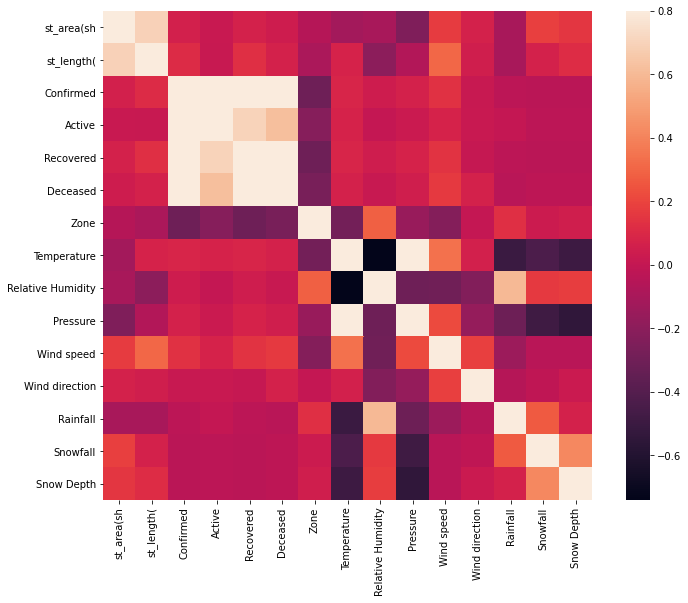

In [8]:
correlation_matrix = df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

In [9]:
def convert_str_to_float(s):
    s_new = s.replace(',', '')
    return float(s_new)

In [10]:
df['Population'] = df['Population'].apply(convert_str_to_float)
df.head()

,st_area(sh,st_length(,Confirmed,Active,Recovered,Deceased,Zone,Population,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Rainfall,Snowfall,Snow Depth
0,1.353967e+10,8.464308e+05,50098,5387,43426,1285,0,3679936.0,308.37,23.87,966.23,4.70,315.61,0.001023,0.0,0.0
1,1.771358e+10,9.720056e+05,82865,13676,67784,1405,0,4993796.0,304.67,39.49,946.62,3.85,299.27,0.016242,0.0,0.0
2,1.294532e+10,7.410244e+05,11822,3574,8091,157,1,2071101.0,309.31,23.72,979.54,0.56,279.09,0.000001,0.0,0.0
3,1.547940e+10,1.014942e+06,9472,1510,7702,260,0,2077144.0,309.29,20.82,969.33,1.24,300.10,0.000001,0.0,0.0
4,1.186387e+10,1.131732e+06,17148,4312,12390,446,1,2876259.0,308.89,22.19,961.30,0.42,358.68,0.000028,0.0,0.0


In [11]:
ss = StandardScaler()
for col in df.columns:
    if(col != 'Zone'):
        df[col] = ss.fit_transform(df[col].values.reshape(-1, 1))

In [12]:
split = ( list(range(80*len(df) // 100)), list(set(range(len(df))) - set(range(80*len(df) // 100))) )
cont_var = [i for i in df.columns if i!='Zone']

In [13]:
X_train = df.iloc[split[0]][cont_var].values
X_valid = df.iloc[split[1]][cont_var].values

In [14]:
Y_train = df.iloc[split[0]].Zone.values
Y_valid = df.iloc[split[1]].Zone.values

In [15]:
oof = np.zeros(X_train.shape[0])
predicitions = np.zeros(X_valid.shape[0])

In [16]:
tnc = TabNetClassifier()
tnc.fit(
    X_train, Y_train, 
    eval_set=[(X_valid, Y_valid)], 
    max_epochs=200,
    patience=100
)

Device used : cpu
epoch 0  | loss: 2.14327 | val_0_accuracy: 0.59441 |  0:00:00s
epoch 1  | loss: 1.75083 | val_0_accuracy: 0.59441 |  0:00:00s
epoch 2  | loss: 1.78665 | val_0_accuracy: 0.53147 |  0:00:00s
epoch 3  | loss: 1.50652 | val_0_accuracy: 0.52448 |  0:00:00s
epoch 4  | loss: 1.45738 | val_0_accuracy: 0.5035  |  0:00:00s
epoch 5  | loss: 1.33021 | val_0_accuracy: 0.52448 |  0:00:00s
epoch 6  | loss: 1.233   | val_0_accuracy: 0.4965  |  0:00:00s
epoch 7  | loss: 1.22931 | val_0_accuracy: 0.45455 |  0:00:00s
epoch 8  | loss: 1.21742 | val_0_accuracy: 0.43357 |  0:00:00s
epoch 9  | loss: 1.15977 | val_0_accuracy: 0.46154 |  0:00:00s
epoch 10 | loss: 1.10336 | val_0_accuracy: 0.5035  |  0:00:00s
epoch 11 | loss: 1.10759 | val_0_accuracy: 0.51049 |  0:00:00s
epoch 12 | loss: 1.09904 | val_0_accuracy: 0.52448 |  0:00:00s
epoch 13 | loss: 1.06717 | val_0_accuracy: 0.55944 |  0:00:00s
epoch 14 | loss: 1.07487 | val_0_accuracy: 0.58042 |  0:00:00s
epoch 15 | loss: 1.06049 | val_0_accu

epoch 133| loss: 0.61119 | val_0_accuracy: 0.68531 |  0:00:07s
epoch 134| loss: 0.6343  | val_0_accuracy: 0.67832 |  0:00:07s
epoch 135| loss: 0.61823 | val_0_accuracy: 0.69231 |  0:00:07s
epoch 136| loss: 0.59675 | val_0_accuracy: 0.68531 |  0:00:07s
epoch 137| loss: 0.61915 | val_0_accuracy: 0.68531 |  0:00:07s
epoch 138| loss: 0.59163 | val_0_accuracy: 0.72727 |  0:00:07s
epoch 139| loss: 0.60411 | val_0_accuracy: 0.71329 |  0:00:08s
epoch 140| loss: 0.59767 | val_0_accuracy: 0.72727 |  0:00:08s
epoch 141| loss: 0.63944 | val_0_accuracy: 0.72028 |  0:00:08s
epoch 142| loss: 0.58616 | val_0_accuracy: 0.70629 |  0:00:08s
epoch 143| loss: 0.6253  | val_0_accuracy: 0.69231 |  0:00:08s
epoch 144| loss: 0.59152 | val_0_accuracy: 0.69231 |  0:00:08s
epoch 145| loss: 0.59854 | val_0_accuracy: 0.68531 |  0:00:08s
epoch 146| loss: 0.60463 | val_0_accuracy: 0.70629 |  0:00:08s
epoch 147| loss: 0.60628 | val_0_accuracy: 0.71329 |  0:00:08s
epoch 148| loss: 0.62931 | val_0_accuracy: 0.67832 |  0

In [20]:
tnc.save_model('models/TabNet')

Successfully saved model at models/TabNet.zip


'models/TabNet.zip'

In [59]:
tnc.get_params()

{'cat_dims': [],
 'cat_emb_dim': 1,
 'cat_idxs': [],
 'clip_value': 1,
 'device_name': 'auto',
 'epsilon': 1e-15,
 'gamma': 1.3,
 'input_dim': 15,
 'lambda_sparse': 0.001,
 'mask_type': 'sparsemax',
 'momentum': 0.02,
 'n_a': 8,
 'n_d': 8,
 'n_independent': 2,
 'n_shared': 2,
 'n_steps': 3,
 'optimizer_fn': torch.optim.adam.Adam,
 'optimizer_params': {'lr': 0.02},
 'output_dim': 3,
 'scheduler_fn': None,
 'scheduler_params': {},
 'seed': 0,
 'verbose': 1}

In [62]:
tnc.batch_size, tnc.best_cost, tnc.best_epoch

(1024, 0.7272727272727273, 138)

In [22]:
tnc.network

TabNet(
  (embedder): EmbeddingGenerator()
  (tabnet): TabNetNoEmbeddings(
    (initial_bn): BatchNorm1d(15, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
    (initial_splitter): FeatTransformer(
      (shared): GLU_Block(
        (shared_layers): ModuleList(
          (0): Linear(in_features=15, out_features=32, bias=False)
          (1): Linear(in_features=16, out_features=32, bias=False)
        )
        (glu_layers): ModuleList(
          (0): GLU_Layer(
            (fc): Linear(in_features=15, out_features=32, bias=False)
            (bn): GBN(
              (bn): BatchNorm1d(32, eps=1e-05, momentum=0.02, affine=True, track_running_stats=True)
            )
          )
          (1): GLU_Layer(
            (fc): Linear(in_features=16, out_features=32, bias=False)
            (bn): GBN(
              (bn): BatchNorm1d(32, eps=1e-05, momentum=0.02, affine=True, track_running_stats=True)
            )
          )
        )
      )
      (specifics): GLU_Block(
   

In [34]:
tnc.explain(X_train)[0].shape

(572, 15)

In [33]:
tnc.explain(X_train)[1]

{0: array([[0.        , 0.        , 0.29124475, ..., 0.        , 0.        ,
         0.01305336],
        [0.        , 0.        , 0.18353286, ..., 0.        , 0.        ,
         0.36933652],
        [0.        , 0.        , 0.23690456, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]),
 1: array([[0.        , 0.        , 0.        , ..., 1.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.2358368 , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
      

In [47]:
tnc.network.tabnet

TabNetNoEmbeddings(
  (initial_bn): BatchNorm1d(15, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
  (initial_splitter): FeatTransformer(
    (shared): GLU_Block(
      (shared_layers): ModuleList(
        (0): Linear(in_features=15, out_features=32, bias=False)
        (1): Linear(in_features=16, out_features=32, bias=False)
      )
      (glu_layers): ModuleList(
        (0): GLU_Layer(
          (fc): Linear(in_features=15, out_features=32, bias=False)
          (bn): GBN(
            (bn): BatchNorm1d(32, eps=1e-05, momentum=0.02, affine=True, track_running_stats=True)
          )
        )
        (1): GLU_Layer(
          (fc): Linear(in_features=16, out_features=32, bias=False)
          (bn): GBN(
            (bn): BatchNorm1d(32, eps=1e-05, momentum=0.02, affine=True, track_running_stats=True)
          )
        )
      )
    )
    (specifics): GLU_Block(
      (glu_layers): ModuleList(
        (0): GLU_Layer(
          (fc): Linear(in_features=16, out_featu

In [48]:
tnc.network.forward_masks

<bound method TabNet.forward_masks of TabNet(
  (embedder): EmbeddingGenerator()
  (tabnet): TabNetNoEmbeddings(
    (initial_bn): BatchNorm1d(15, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
    (initial_splitter): FeatTransformer(
      (shared): GLU_Block(
        (shared_layers): ModuleList(
          (0): Linear(in_features=15, out_features=32, bias=False)
          (1): Linear(in_features=16, out_features=32, bias=False)
        )
        (glu_layers): ModuleList(
          (0): GLU_Layer(
            (fc): Linear(in_features=15, out_features=32, bias=False)
            (bn): GBN(
              (bn): BatchNorm1d(32, eps=1e-05, momentum=0.02, affine=True, track_running_stats=True)
            )
          )
          (1): GLU_Layer(
            (fc): Linear(in_features=16, out_features=32, bias=False)
            (bn): GBN(
              (bn): BatchNorm1d(32, eps=1e-05, momentum=0.02, affine=True, track_running_stats=True)
            )
          )
        )
   

In [54]:
tnc.feature_importances_

array([0.12590561, 0.01408591, 0.0779236 , 0.00064253, 0.0156759 ,
       0.0700948 , 0.15633647, 0.02578239, 0.15234657, 0.01283902,
       0.10295493, 0.14120386, 0.05444484, 0.02737296, 0.02239059])

In [55]:
tnc.

1e-15

1.3

In [17]:
n_estimators = 1000 if not os.getenv("CI", False) else 20

In [18]:
from xgboost import XGBClassifier

clf_xgb = XGBClassifier(max_depth=8,
    learning_rate=0.1,
    n_estimators=n_estimators,
    verbosity=0,
    silent=None,
    objective="multi:softmax",
    booster='gbtree',
    n_jobs=-1,
    nthread=None,
    gamma=0,
    min_child_weight=1,
    max_delta_step=0,
    subsample=0.7,
    colsample_bytree=1,
    colsample_bylevel=1,
    colsample_bynode=1,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    base_score=0.5,
    random_state=0,
    seed=None,)

clf_xgb.fit(X_train, Y_train,
            eval_set=[(X_valid, Y_valid)],
            early_stopping_rounds=40,
            verbose=10)

[0]	validation_0-merror:0.27972
Will train until validation_0-merror hasn't improved in 40 rounds.
[10]	validation_0-merror:0.23776
[20]	validation_0-merror:0.22378
[30]	validation_0-merror:0.23077
[40]	validation_0-merror:0.23077
[50]	validation_0-merror:0.23077
Stopping. Best iteration:
[18]	validation_0-merror:0.21678



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=-1, nthread=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=0, silent=None,
              subsample=0.7, tree_method='exact', validate_parameters=1,
              verbosity=0)

In [36]:
tnc.network.input_dim

15

In [37]:
tnc.network.output_dim

3

In [38]:
tnc.network.cat_dims

[]

In [39]:
tnc.cat_emb_dim

1

In [40]:
tnc.classes_

array([0, 1, 2])

In [46]:
# this computes loss -> tnc.compute_loss(y_pred, y_true)
tnc.network.embedder??